In [15]:
import pymangle
import healpy as hp
import numpy as np
import esutil
import os

file_outdir = '/fs/scratch/PCON0008/warner785/bwarner/'
# read a mangle polygon file
m=pymangle.Mangle(file_outdir+"mask_DR12v5_CMASS_South.ply")

print(m)
#create a full sky healpix map in very high resolution (NSIDE=32768)
full_sky = np.full(hp.nside2npix(4096), hp.UNSEEN)
n_good_pixels_at_4096 = hp.nside2npix(4096)
print(m.get_areas())
#def my_func(min, max)->list:     
#    return list(range(min, max))

#N = n_good_pixels_at_4096; 
#pixels = my_func(0,N)
#pixels = np.array(pixels)
#print(pixels.shape)

#pixels = np.zeros(n_good_pixels_at_32768)
#for x in range(pixels.size):
    #if x>0:
        #pixels[x]=pixels[x-1]+1

#ra, dec = hp.pix2ang(4096, pixels, lonlat=True)
#print(np.max(ra), np.min(ra))
#print(np.max(dec), np.min(dec))

# test an ra,dec point against the mask
#good = m.contains(200.0, 0.0)

# test arrays of ra,dec points against the mask
#ra = np.array([359.989013671875, 0.0])
#dec = np.array([89.98857866011927, -89.98857866011926])

#check cmass here:


good = m.contains(train_sample['RA'],train_sample['DEC'])

print(sum(good))
print(len(good))

# get the polygon ids
#ids = m.polyid(train_sample['RA'],train_sample['DEC'])

# get the weights
#weights = m.weight(ra,dec)

# get both polyids and weights
#ids, weights = m.polyid_and_weight(ra, dec)

# generate random points    
#ra_rand, dec_rand = m.genrand(1000)

# generate randoms from the mask and with the additional constraint that they
# are within the specified rectangle.  This speeds things up if your mask is
# relatively small compared to the full sphere; choose the box just big enough
# to contain the mask.

#ra_min=200.0
#ra_max=210.0
#dec_min=0.0
#dec_max=10.0
#ra_rand, dec_rand = m.genrand_range(1000,ra_min,ra_max,dec_min,dec_max)

# get the polygon weights
#weights = m.weights

# read in a new set of weights
#m.read_weightfile(weightfile)

# set the weights

#m.weights = weight_array

# sparcely sample mangle mask -- nside 4096 or 1 higher
# sample mangle mask == 0, 1 pixels out or in, m.contain for finding center of pixel
# check stablity with nside 

#downgrade the resolution of the weights to 4096
##downgrade = hp.pixelfunc.ud_grade(weights, 4096, pess=False, order_in='RING', order_out=None, power=None, dtype=None)

#SAVE THE WEIGHTS FILE
#np.savetxt('/fs/scratch/PCON0008/warner785/bwarner/cmass_mask.txt', good)

Mangle
	file:       /fs/scratch/PCON0008/warner785/bwarner/mask_DR12v5_CMASS_South.ply
	area:       10337.8 sqdeg
	npoly:      33072
	pixeltype:  's'
	pixelres:   6
	real:       10
	npix:       3861
	snapped:    1
	balkanized: 1
	weightfile: 
	verbose:    0

[0.57943596 0.13747585 0.12491481 ... 0.30749082 0.12237931 0.05444705]
258884
258884


In [7]:
import pymangle
import healpy as hp
import numpy as np
import esutil
import fitsio
import os

path = '/fs/scratch/PCON0008/warner785/bwarner/'
x = fitsio.read(path + 'mask_DR12v5_CMASS_South.fits.gz')
m = pymangle.Mangle(path + 'mask_DR12v5_CMASS_South.ply')

select_north = (x['RAMID']>100)*(x['RAMID']<300)
select_south = ~select_north

poly_areas = m.get_areas()
#tot_num = m.get_npoly()

area_north = np.sum(poly_areas[select_north])
area_south = np.sum(poly_areas[select_south])

#num_south = np.sum(tot_num[select_south])

In [2]:
print(area_south)
#print(num_south)

2901.8059807725780206


In [3]:
?m

Type:        Mangle
String form:
Mangle
           file:       /fs/scratch/PCON0008/warner785/bwarner/mask_DR12v5_CMASS_South.ply
           area:     <...>   6
           real:       10
           npix:       3861
           snapped:    1
           balkanized: 1
           weightfile:
           verbose:    0
           
File:        ~/.conda/envs/DES_env/lib/python3.7/site-packages/pymangle/mangle.py
Docstring:  
A class to work with Mangle masks.

construction
    import pymangle
    m=pymangle.Mangle(mask_file, verbose=False)


read-only properties
--------------------
    filename
    area
    npoly
    is_pixelized
    pixeltype
    pixelres
    maxpix
    is_snapped
    is_balkanized
    weightfile

See docs for each property for more details.

methods
----------------------
    polyid(ra,dec)
    weight(ra,dec)
    polyid_and_weight(ra,dec)
    contains(ra,dec)
    genrand(nrand)
    genrand_range(nrand,ramin,ramax,decmin,decmax)
    calc_simplepix(ra,dec)
    read_weights(wei

In [21]:
m.get_pixels()

array([1517, 1517, 1518, ..., 3860, 3860, 3860])

In [ ]:
import pymangle
import healpy as hp
import numpy as np
import esutil
import os

#np.savetxt('/fs/scratch/PCON0008/warner785/bwarner/RA_mask.txt', ra[good==True])
#np.savetxt('/fs/scratch/PCON0008/warner785/bwarner/DEC_mask.txt', dec[good==True])

# get the polygon ids
#ids = m.polyid(ra,dec)

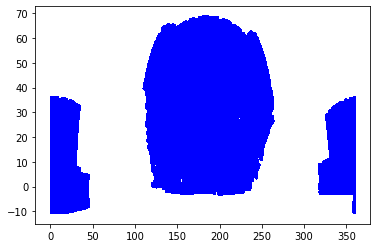

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot( ra[good==True], dec[good==True], "b,")
#train_sample['RA'][train_sample['RA'][good==True]]

(33072,)


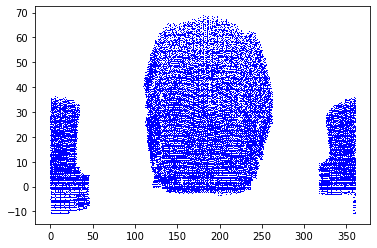

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot( cmass["RAMID"], cmass["DECMID"], "b,")
print(cmass.shape)

In [26]:
print(np.sum(cmass["WEIGHT"]))

9309.860977317852


In [1]:
def keepGoodRegion(des, hpInd = False, balrog=None):
    import healpy as hp
    import fitsio
    # 25 is the faintest object detected by DES
    # objects larger than 25 considered as Noise
    
    path = '/fs/scratch/PCON0008/warner785/bwarner/'
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v2_il22_seeil4.0_nside4096ring_redlimcut.fits')
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits')
    LSSGoldmask = fitsio.read(path+'MASK_Y3LSSBAOSOF_22_3_v2p2.fits')
    ringhp = hp.nest2ring(4096, [LSSGoldmask['PIXEL']])
    #Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits
    #frac_cut = LSSGoldmask['FRAC'] > 0.8
    #ind_good_ring = LSSGoldmask['PIXEL'][frac_cut]
    ind_good_ring = ringhp
    
    # healpixify the catalog.
    nside=4096
    # Convert silly ra/dec to silly HP angular coordinates.
    phi = des['RA'] * np.pi / 180.0
    theta = ( 90.0 - des['DEC'] ) * np.pi/180.0

    hpInd = hp.ang2pix(nside,theta,phi,nest=False)
    keep = np.in1d(hpInd, ind_good_ring)
    des = des[keep]
    if hpInd is True:
        return ind_good_ring
    else:
        return des

In [8]:
import esutil
import fitsio
import numpy as np
cmass = esutil.io.read('/fs/scratch/PCON0003/warner785/bwarner/cmass-dr12v4-S-Reid-full.dat.fits')
train_sample = esutil.io.read('/fs/scratch/PCON0003/warner785/bwarner/cmass-dr12v4-S-Reid-full.dat.fits')
#train_sample = esutil.io.read('/global/cscratch1/sd/bwarner/galaxy_DR11v1_CMASS_South-photoObj.fits.gz')
print('total num of train', train_sample.size)
print('\n--------------------------------\n applying DES veto mask to CMASS\n--------------------------------')   
#train_sample = keepGoodRegion(train_sample)

#fitsio.write( output_dir+'/cmass_in_st82.fits', train_sample)

print('num of train_sample after des veto', train_sample.size)

total num of train 258884

--------------------------------
 applying DES veto mask to CMASS
--------------------------------
num of train_sample after des veto 258884


In [17]:
m = pymangle.Mangle("/fs/scratch/PCON0008/warner785/bwarner/mask_DR12v5_CMASS_South.ply")
train_sample = esutil.io.read('/fs/scratch/PCON0003/warner785/bwarner/cmass-dr12v4-S-Reid-full.dat.fits')
good = m.contains(train_sample['RA'],train_sample['DEC'])
print(good.size)
tot = m.contain(ra,dec)
print(tot.size)

258884
33072


In [28]:
#create a full sky healpix map in very high resolution (NSIDE=32768)
full_sky = np.full(hp.nside2npix(4096), hp.UNSEEN)
n_good_pixels_at_4096 = hp.nside2npix(4096)  

pixels = np.zeros(n_good_pixels_at_4096)
for x in range(pixels.size):
    if x==0:
        pixels[0]= np.int(pixels[0])
    if x>0:
        pixels[x]=np.int(pixels[x-1]+1)

In [29]:
ra, dec = hp.pix2ang(4096, pixels, lonlat=True)

TypeError: ufunc '_pix2ang_ring' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [6]:
cmass = esutil.io.read('/fs/scratch/PCON0008/warner785/bwarner/mask_DR12v5_CMASS_South.fits.gz')

In [9]:
print(cmass.dtype.names)

('XCAPS', 'CMCAPS', 'NCAPS', 'WEIGHT', 'PIXEL', 'STR', 'USE_CAPS', 'AREANAME', 'IBOSS', 'SECTOR', 'SECTORAREA', 'NTILES', 'TILES', 'CHUNK', 'TARGETFILE', 'CHUNKVECTOR', 'RAMID', 'DECMID', 'MASKEDAREA')


In [10]:
import os, sys
import esutil
import healpy as hp
import numpy as np
import fitsio
sys.path.append('../')
from xd import *
from run_DMASS import *
from utils import *
import healpy as hp
from systematics import *
from cmass_modules import io
os.chdir('../../DMASS_XDGMM/code_py3/')
print(os.getcwd())
from xdgmm import XDGMM as XDGMM_Holoien
os.chdir('../../DMASSY3/code_py3/')
print(os.getcwd())

print(ra[good == True].size)
ra_good = ra[good==True]
dec_good = dec[good == True]
#ra_mask = np.in1d(ra_good, train_sample["RA"], assume_unique=False, invert=False)
mg1, mg2, _ = esutil.htm.HTM(10).match(train_sample['RA'], train_sample['DEC'], ra_good, \
                                         dec_good,2./3600, maxmatch=1)
cmass_mask = np.zeros(ra_good.size, dtype=bool)
cmass_mask[mg2] = 1

print(train_sample[mg1].size)


#clean_cmass_data_des, nocmass = gold_st82[cmass_mask], gold_st82[~cmass_mask]

#import matplotlib.pyplot as plt
#fig, ax = plt.subplots()
#ax.plot( train_sample['RA'][train_sample['RA']==ra[good==True]], train_sample['DEC'][train_sample['DEC']==dec[good==True]], "b,")

/users/PCON0003/warner785/DMASS_XDGMM/code_py3
/users/PCON0003/warner785/DMASSY3/code_py3
50430593
297


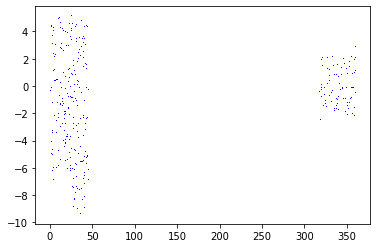

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot( train_sample["RA"][mg1], train_sample["DEC"][mg1], "b,")